In [1]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
modelLM = SentenceTransformer("all-MiniLM-L6-v2")

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
modelUSE = hub.load(module_url)

In [ ]:
# Load some cicuit sentences
from qtn_sim import *
n = 200

circuitsGHZ = [GHZCircuit(i).toString() for i in range(1,n)]
circuitsQFT = [QFTCircuit(i).toString() for i in range(1,n)]
circuitsWState = [WCircuitLinear(i).toString() for i in range(1,n)]

In [ ]:

# 2. Calculate embeddings by calling model.encode()
embeddingsGHZ = modelLM.encode(circuitsGHZ)
embeddingsQFT = modelLM.encode(circuitsQFT)
embeddingsWState = modelLM.encode(circuitsWState)

# embeddingsGHZ_USE = modelUSE(circuitsGHZ)
# embeddingsQFT_USE = modelUSE(circuitsQFT)
# embeddingsWState_USE = modelUSE(circuitsWState)

# print(embeddings.shape)
# similarities = modelLM.similarity(embeddingsGHZ, embeddingsGHZ)
# print(similarities)

In [25]:
import random
random.shuffle(circuitsGHZ)
embeddingsGHZ_USE = [modelUSE([circuit]).numpy()[0] for circuit in circuitsGHZ]
embeddingsQFT_USE = [modelUSE([circuit]).numpy()[0] for circuit in circuitsQFT]
embeddingsWState_USE = [modelUSE([circuit]).numpy()[0] for circuit in circuitsWState]

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(embeddingsGHZ_USE)
pca = PCA(n_components=2)
y = pca.fit_transform(embeddingsQFT_USE)
pca = PCA(n_components=2)
z = pca.fit_transform(embeddingsWState_USE)


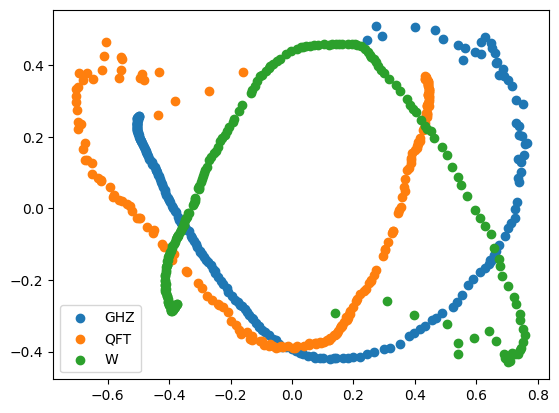

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()
ax.scatter(x[:, 0],x[:, 1], label="GHZ")
ax.scatter(y[:, 0],y[:, 1], label="QFT")
ax.scatter(z[:, 0],z[:, 1], label="W")
ax.legend()
plt.show()

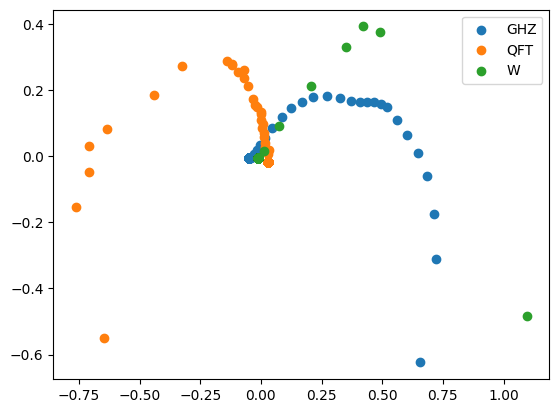

In [23]:
pca = PCA(n_components=2)
x = pca.fit_transform(embeddingsGHZ)
pca = PCA(n_components=2)
y = pca.fit_transform(embeddingsQFT)
pca = PCA(n_components=2)
z = pca.fit_transform(embeddingsWState)

fig = plt.figure()
ax = plt.axes()
ax.scatter(x[:, 0],x[:, 1], label="GHZ")
ax.scatter(y[:, 0],y[:, 1], label="QFT")
ax.scatter(z[:, 0],z[:, 1], label="W")
ax.legend()
plt.show()

In [64]:
# testing on large circuit bank

circuitDB = readCircuits("C:/Users/aadik/QuantumSim/copy/dataset/data/data1/circuits_depth100_num10000_q20.json")

circuitDBLongDistance = readCircuits("C:/Users/aadik/QuantumSim/copy/dataset/data/data2/circuitslongDistance_depth100_num10000_q20.json")

circuitStrings = [c.toString() for c in circuitDB]

circuitStringsld = [c.toString() for c in circuitDBLongDistance]


In [ ]:

depth1 = [len(c.gateList) for c in circuitDB]

depth2 = [len(c.gateList) for c in circuitDBLongDistance]

embeddings= modelUSE(circuitStrings)
pca = PCA(n_components=2)
X = pca.fit_transform(embeddings)

embeddingsld= modelUSE(circuitStringsld)
pca = PCA(n_components=2)
Y = pca.fit_transform(embeddingsld)

KeyboardInterrupt: 

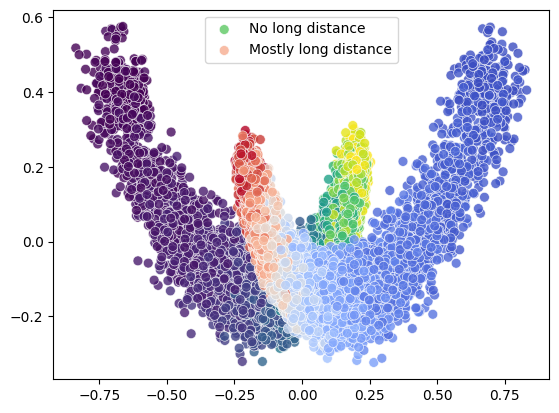

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(X[:, 0],X[:, 1],c=depth1, cmap='viridis', alpha=0.8, s=50, edgecolors='w', linewidth=0.5, label="No long distance")
ax.scatter(Y[:, 0],Y[:, 1],c=depth2, cmap='coolwarm', alpha=0.8, s=50, edgecolors='w', linewidth=0.5, label="Mostly long distance")

# ax.scatter(X[:, 0],X[:, 1], label="No long distance")
# ax.scatter(Y[:, 0],Y[:, 1], label="Mostly long distance")


ax.legend()
plt.show()